In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn



In [36]:
#CARGO DATASET

C_tweets = pd.read_csv("train.csv")
C_CantTweetsEnDf=len(C_tweets.index)

In [37]:
C_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [38]:
#Quito tweets duplicados
C_tweetsND = C_tweets.drop_duplicates(subset='text')


In [39]:
C_tweetsND

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


In [40]:
#Cambio NaN por Nothing en Keyword
C_tweetsND['keyword'] = C_tweetsND['keyword'].fillna('Nothing') 

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
#Veo Distintos Keyword
C_keyword = C_tweetsND['keyword'].unique()

In [42]:
C_keyword

array(['Nothing', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail'

In [43]:
#Cuantas leyword distintas existen en el df
len(C_keyword)

222

In [44]:
#Agrupo por keyword  y cuenta las ocurrencias de cada uno
C_grouped = C_tweetsND.groupby(['keyword']).agg({'id':'count'}).rename(columns={"id": "cantidad"})

In [45]:
C_grouped.reset_index(inplace=True)

In [46]:
C_grouped

,keyword,cantidad
0,Nothing,56
1,ablaze,35
2,accident,35
3,aftershock,32
4,airplane%20accident,34
...,...,...
217,wounded,37
218,wounds,33
219,wreck,37
220,wreckage,37


In [47]:
#Chequeo
print ("Suma de keyword agrupadas:", C_grouped.cantidad.sum(), " = ","Cantidad de filas en df:" , len(C_tweetsND.index))

Suma de keyword agrupadas: 7503  =  Cantidad de filas en df: 7503


In [48]:
#Area del plot mas alto que ancho
plt.rcParams['figure.figsize'] = (15, 30)

Text(0.5, 1.0, 'Plot a poner Titulo')

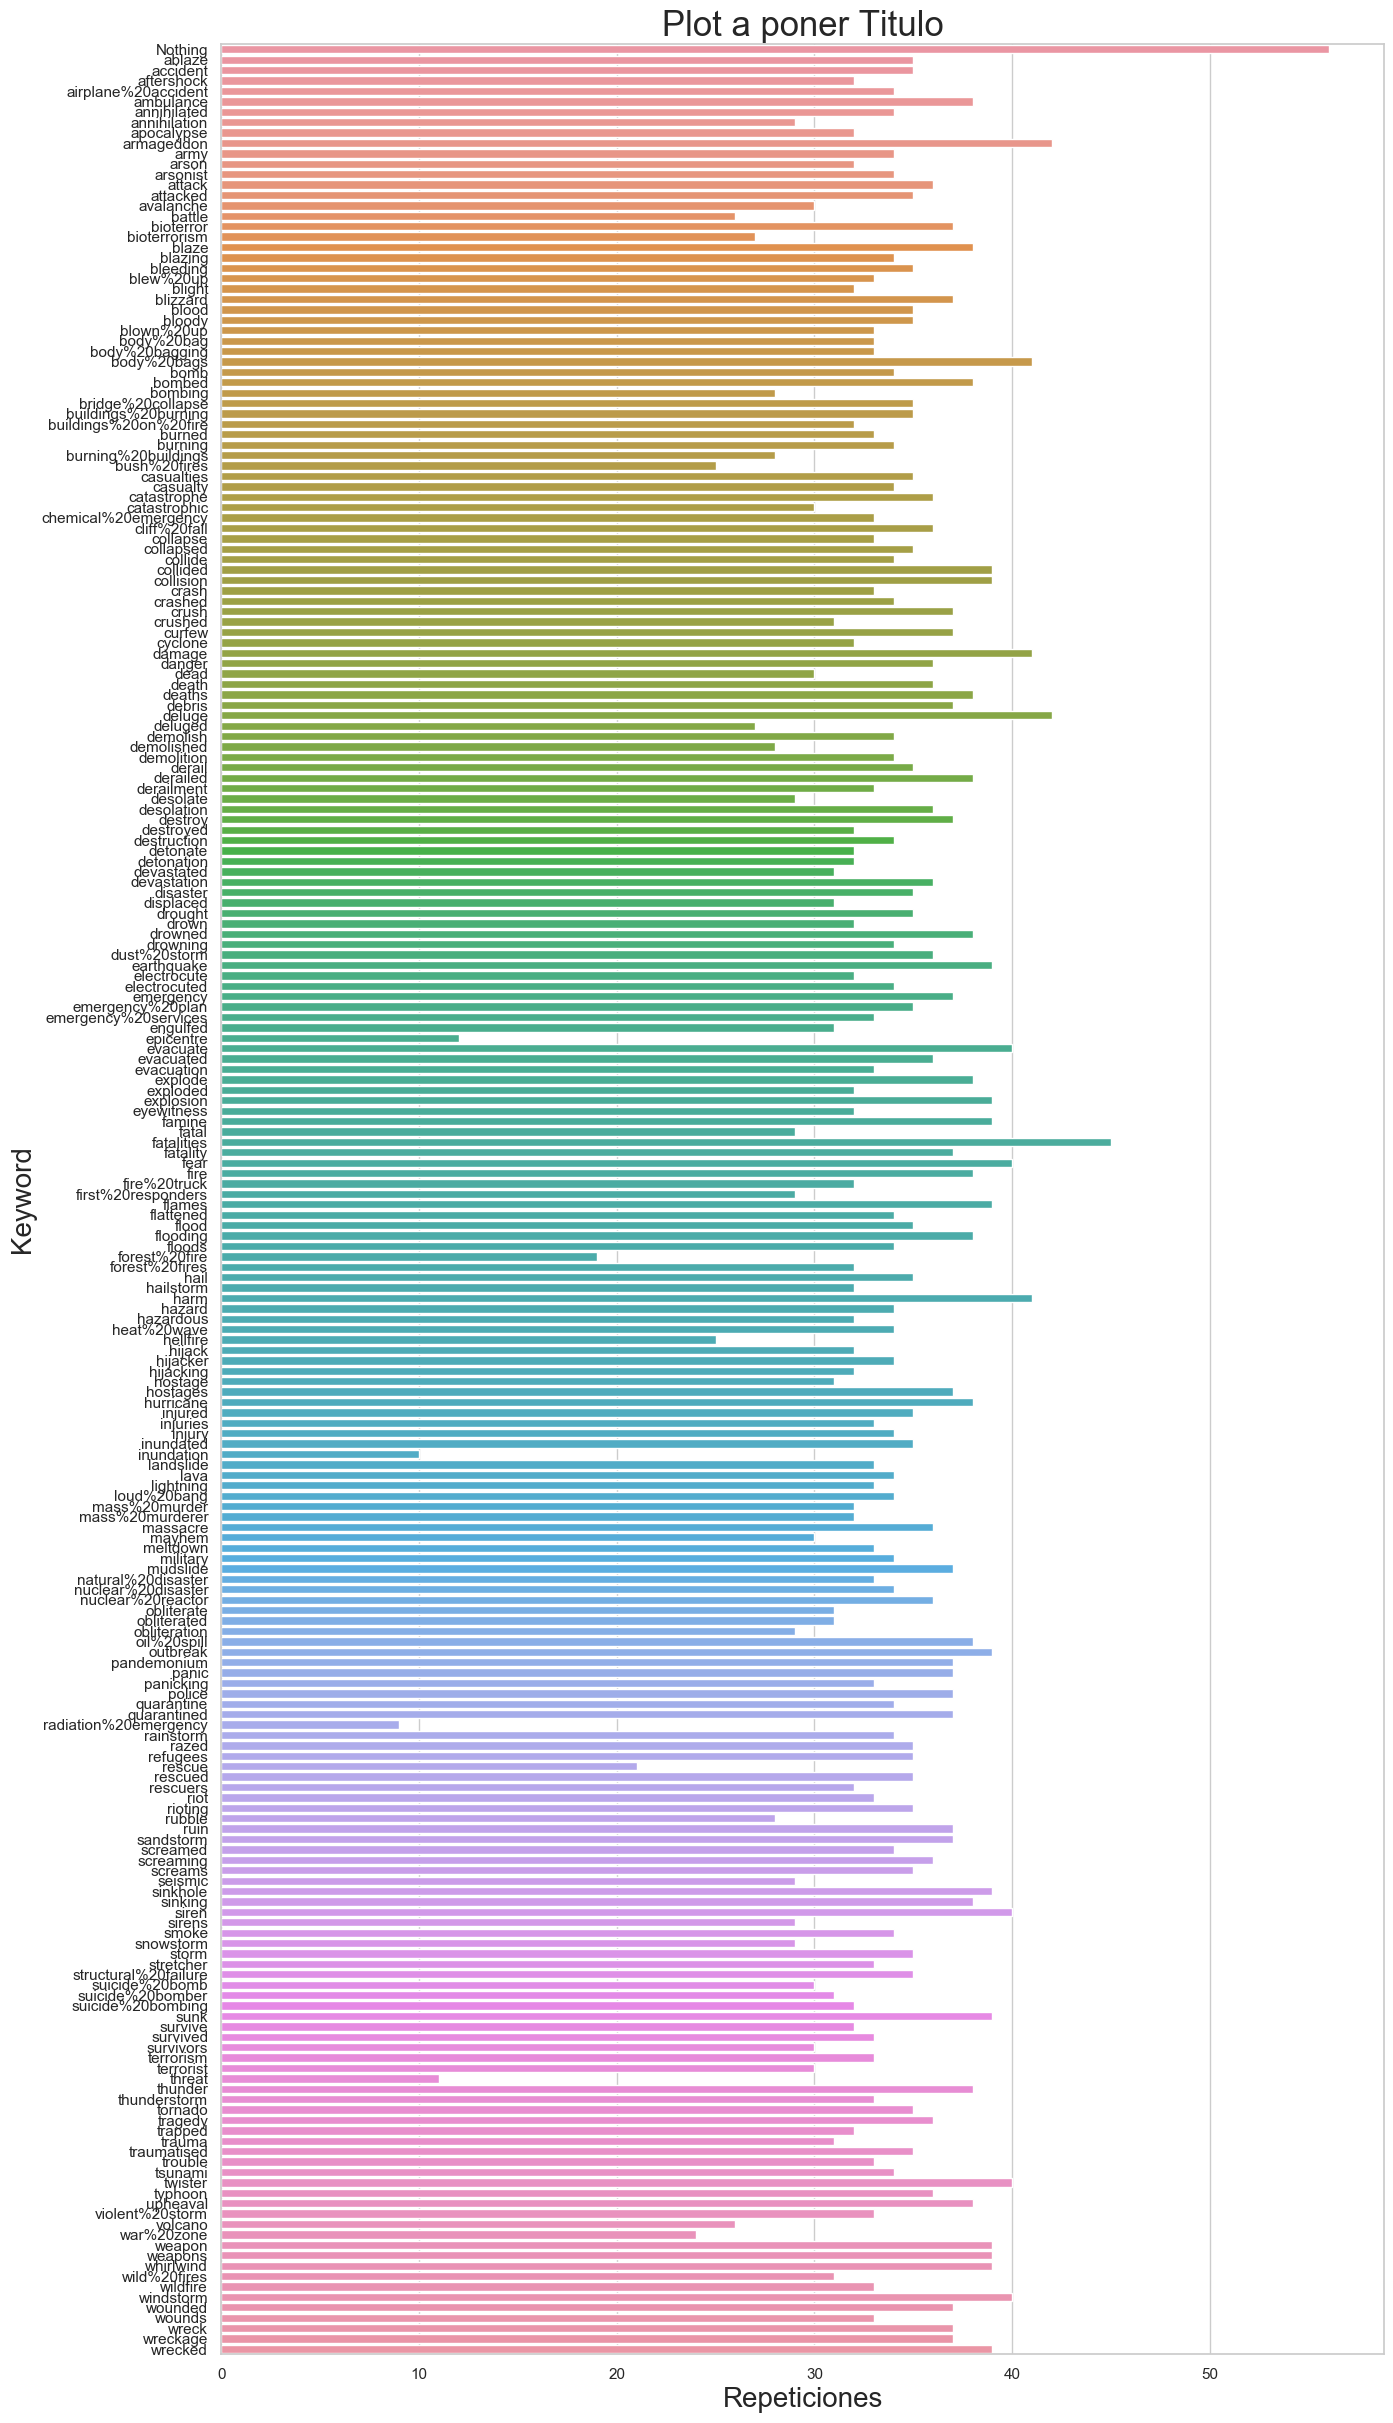

In [49]:
ax = sns.barplot(x="cantidad", y="keyword", data=C_grouped,orient='h')

ax.set_ylabel('Keyword', fontsize=20)
ax.set_xlabel('Repeticiones', fontsize=20)
ax.set_title("Plot a poner Titulo", fontsize=25)

In [50]:
#TODO, achicar keywords--> Agrupara los que significan casi lo mismo